# Plot 2D corrtag images for a given of time ranges
Author: Jo Taylor

Date: Sept. 22 2020

In [1]:
# This makes the notebook fill the length of the browser window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display("text/html", "<style>.container { width:100% !important; }</style>")

'text/html'

'<style>.container { width:100% !important; }</style>'

In [2]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as pl

from query_darks import files_by_mjd

/System/Volumes/Data/astro/sveash/cos_dark/query_darks.py:11: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  SETTINGS = yaml.load(f)


## To connect to your local database, change `dbname` below.
This should include the full path of the database, e.g. `/path/to/cos_dark.db`. If in the current directory, do not include `.` or `./`, simply use `cos_dark.db`.

In [3]:
# Given an MJD start and end, return list of corrtag files
def get_corrtag_files(mjdstart, mjdend, segment="FUVA"):
    df = files_by_mjd(mjdstart, mjdend, segment=segment, dbname="cos_dark.db")
    files = df["fileloc"].to_list()
    return files

## In the below cell, you can change the date ranges in `time_ranges`, or add more key/values pairs for other time ranges of interest.
All time ranges will be automatically plotted in the following cell.

In [4]:
# MJD dates to query the database on. These can be changed as desired, or more key/value pairs can be added.
# By default, only get SEGMENT=FUVA files. Can change to FUVB or *
time_ranges = {"B/A Max": (56550, 56570),
               "B/A Min": (56740, 56760),
               "Post": (57520, 57540)}
file_ranges = {}
for k,trange in time_ranges.items():
    files = get_corrtag_files(mjdstart=trange[0], mjdend=trange[1], segment="FUVA")
    file_ranges[k] = files    

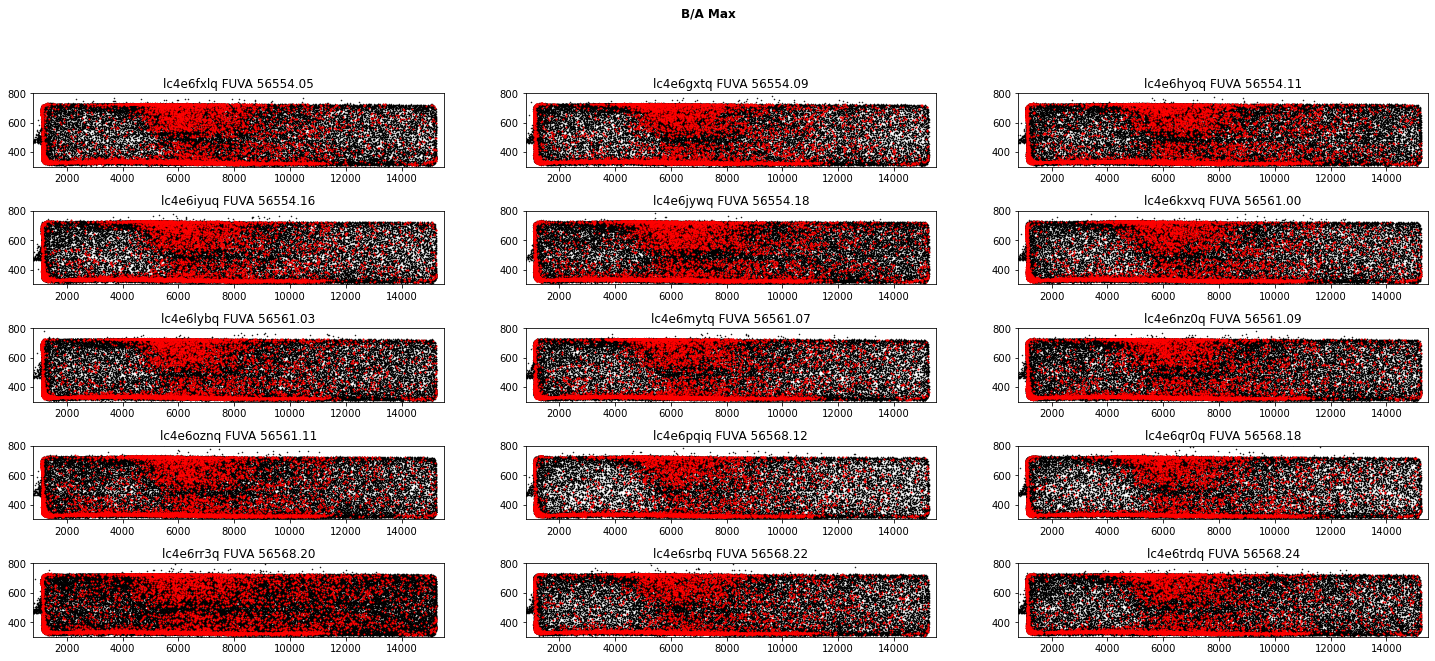

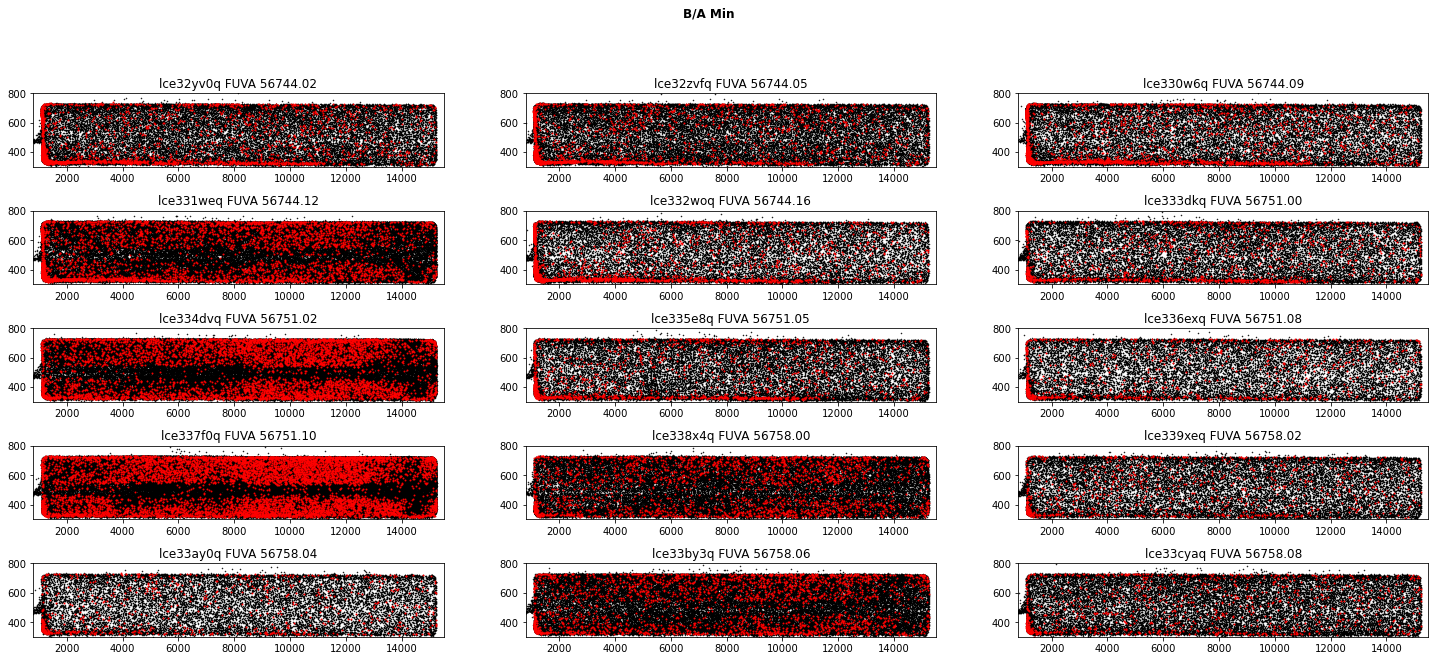

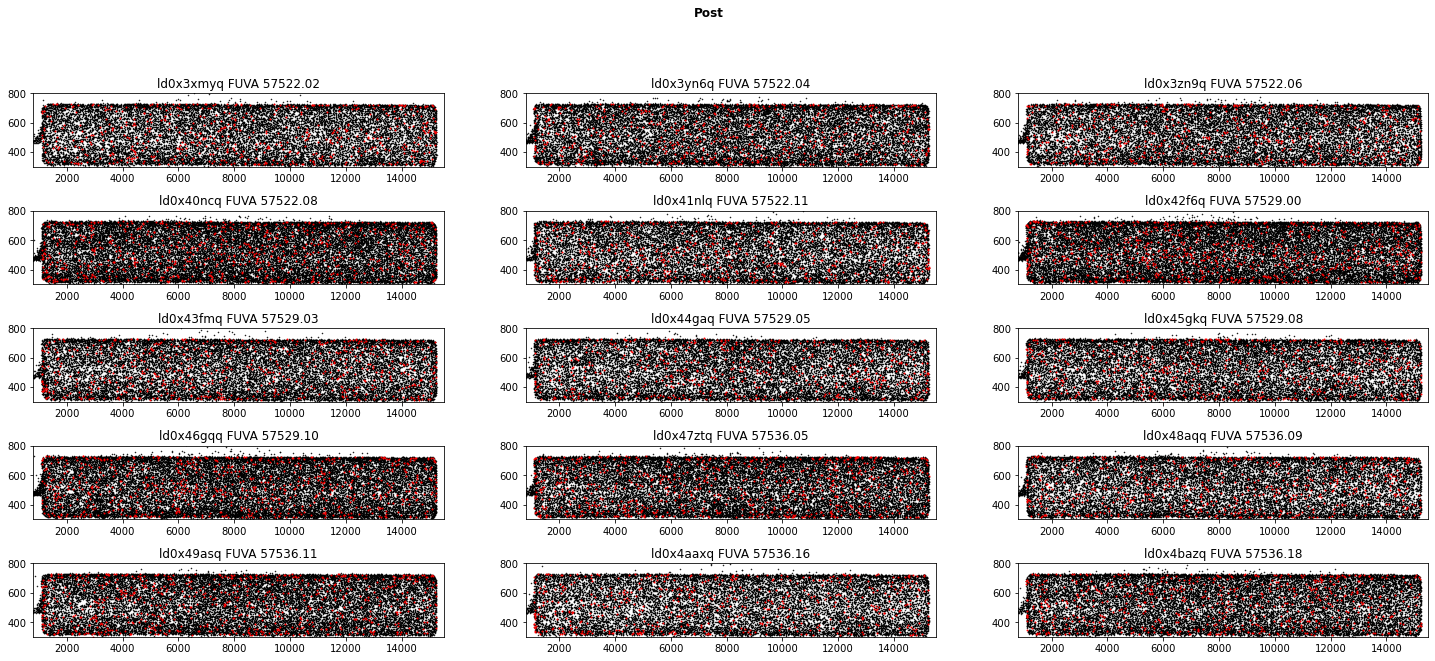

In [5]:
# Create subplots for the corrtag files as 2D images
for lbl, files in file_ranges.items():
    ncols = 3
    nrows = int(np.ceil(len(files)/ncols))
    fig, axes = pl.subplots(nrows, ncols, figsize=(25, 2*nrows))
    pl.suptitle(lbl, y=1.0, fontweight="bold")
    pl.subplots_adjust(hspace=0.6)
    for i, ax in enumerate(axes.flatten()):
        data = fits.getdata(files[i])     
        not_11 = np.where(data["pha"] != 11)[0]
        is_11 = np.where(data["pha"] == 11)[0]
        ax.plot(data["xfull"][not_11], data["yfull"][not_11], "k.", markersize=1)
        ax.plot(data["xfull"][is_11], data["yfull"][is_11], "r.", markersize=2, alpha=0.9)
        
        rootname = os.path.basename(files[i])[:9]
        segment = fits.getval(files[i], "segment")
        expstart = fits.getval(files[i], "expstart", 1)
        ax.set_title(f"{rootname} {segment} {expstart:.2f}")
        ax.set_ylim(300, 800)
        ax.set_xlim(800, 15500)